# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [ ]:
import warnings, textwrap, os, math, joblib
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

try:
    from yellowbrick.cluster import KElbowVisualizer
    _YB_OK = True
except Exception:
    _YB_OK = False

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)
sns.set_theme(style="whitegrid")

pd.set_option('display.max_columns', None)

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?output=csv'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [ ]:
# Load data
url='https://docs.google.com/spreadsheets/d/e/2PACX-1vTbg5WVW6W3c8SPNUGc3A3AL-AG32TPEQGpdzARfNICMsLFI0LQj0jporhsLCeVhkN5AoRsTkn08AYl/pub?output=csv'
pd.set_option('display.max_columns', None)

df = pd.read_csv(url)

In [ ]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 8:06:39


In [ ]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   PreviousTransactionDate  2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [ ]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**


Kolom numerik (max 20 preview): ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
Kolom kategorikal (max 20 preview): ['TransactionID', 'AccountID', 'PreviousTransactionDate', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation', 'TransactionDate']


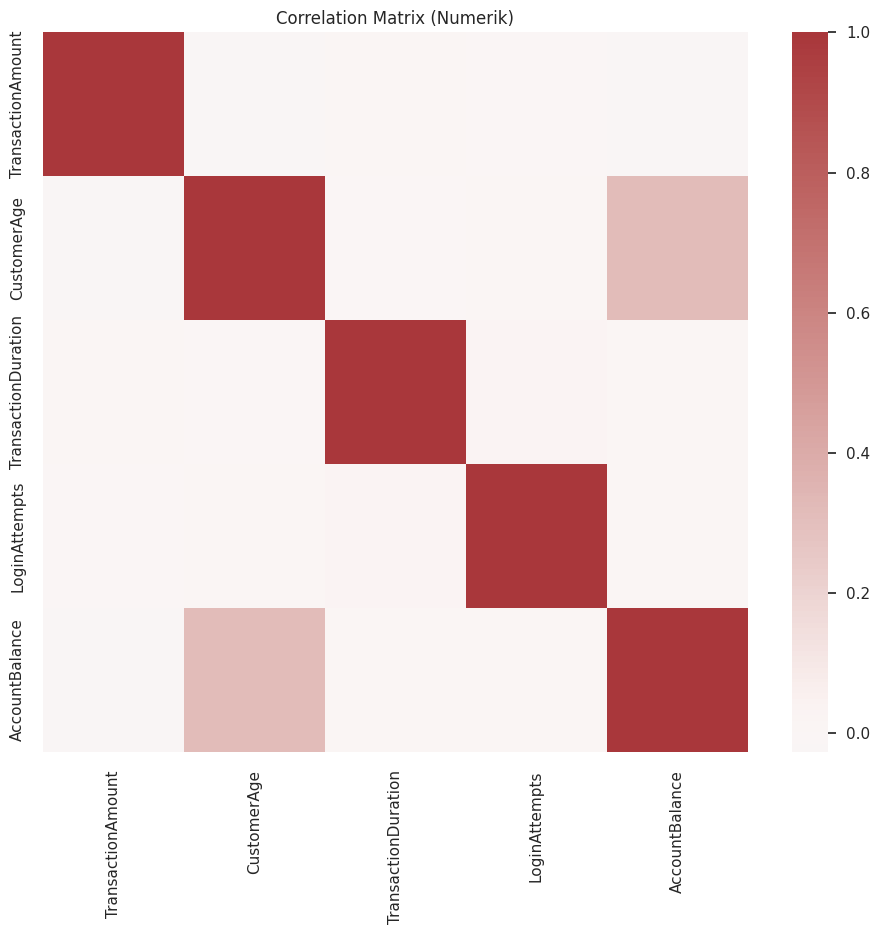

In [ ]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()

print("\nKolom numerik (max 20 preview):", num_cols[:20])
print("Kolom kategorikal (max 20 preview):", cat_cols[:20])

# --- Matriks Korelasi (numerik) ---
if len(num_cols) >= 2:
    plt.figure(figsize=(min(1.1 * len(num_cols) + 4, 14), min(1.1 * len(num_cols) + 4, 14)))
    sns.heatmap(df[num_cols].corr(numeric_only=True), cmap="vlag", center=0, annot=False)
    plt.title("Correlation Matrix (Numerik)")
    plt.tight_layout()
    plt.show()

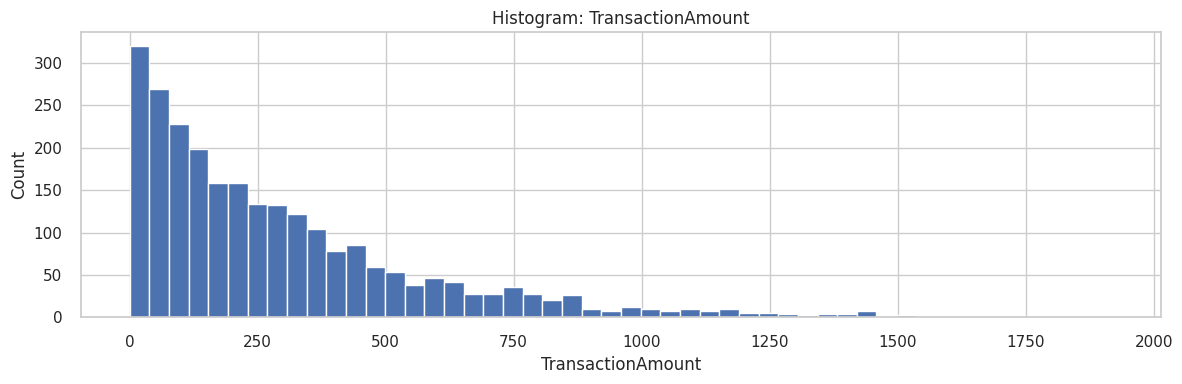

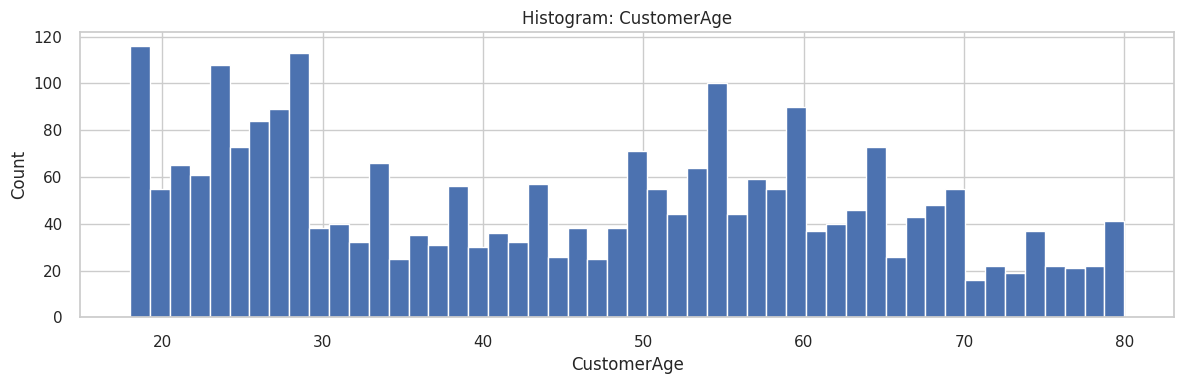

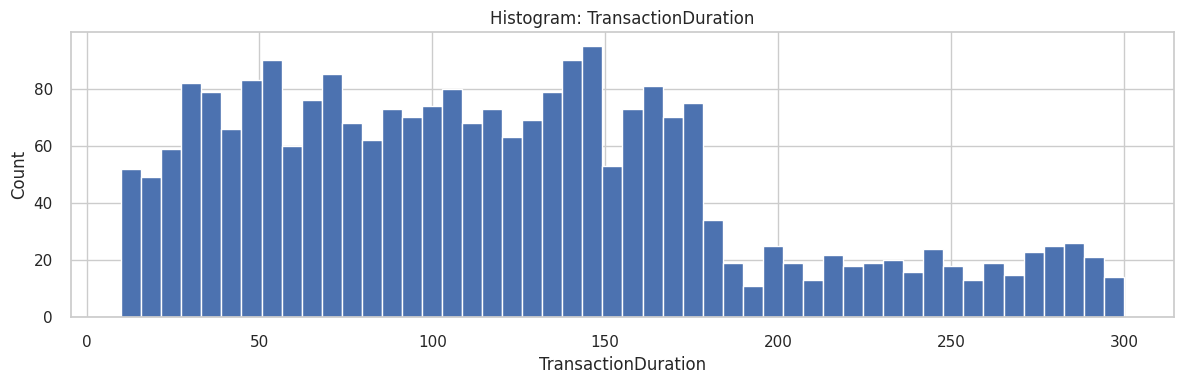

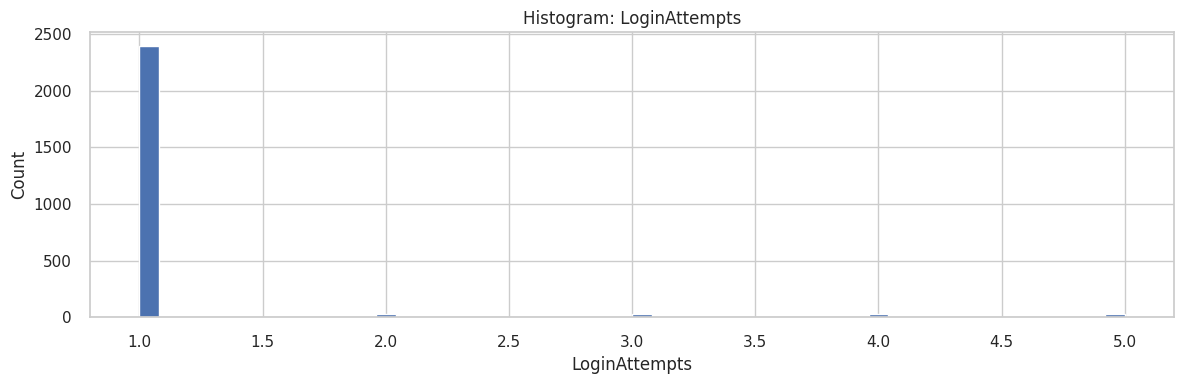

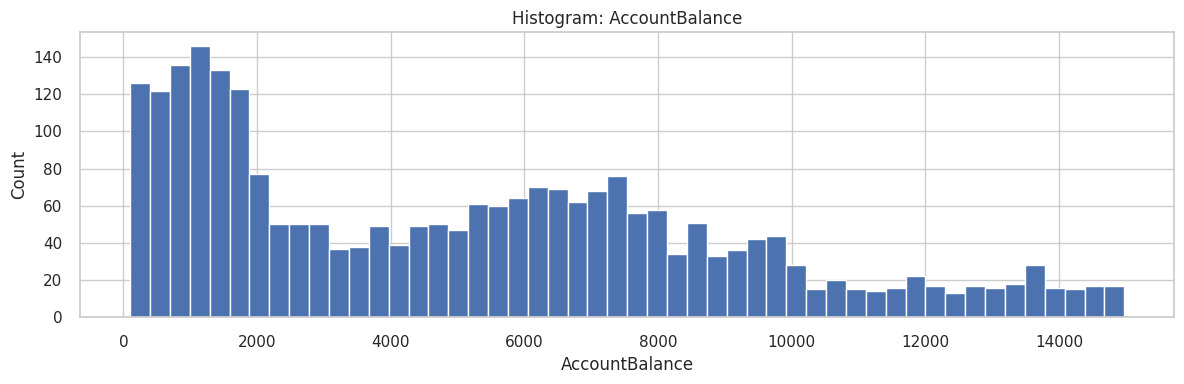

In [ ]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
# --- Histogram/Countplot semua kolom (tanpa label overlap) ---
def _wrap_labels(ax, width=12):
    labels = [textwrap.fill(t.get_text(), width) for t in ax.get_xticklabels()]
    ax.set_xticklabels(labels, rotation=30, ha='right')

# Numerik
for c in num_cols[:8]:
    x = df[c]
    x = pd.to_numeric(x, errors="coerce")  # in case of mixed types
    x = x.dropna()
    fig, ax = plt.subplots(figsize=(12, 4))  # Increased figure size
    ax.hist(x, bins=50)  # Increased number of bins
    ax.set_title(f"Histogram: {c}")
    ax.set_xlabel(c)
    ax.set_ylabel("Count")
    ax.spines['bottom'].set_position('zero')  # Center the x-axis
    plt.tight_layout()
    plt.show()



(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

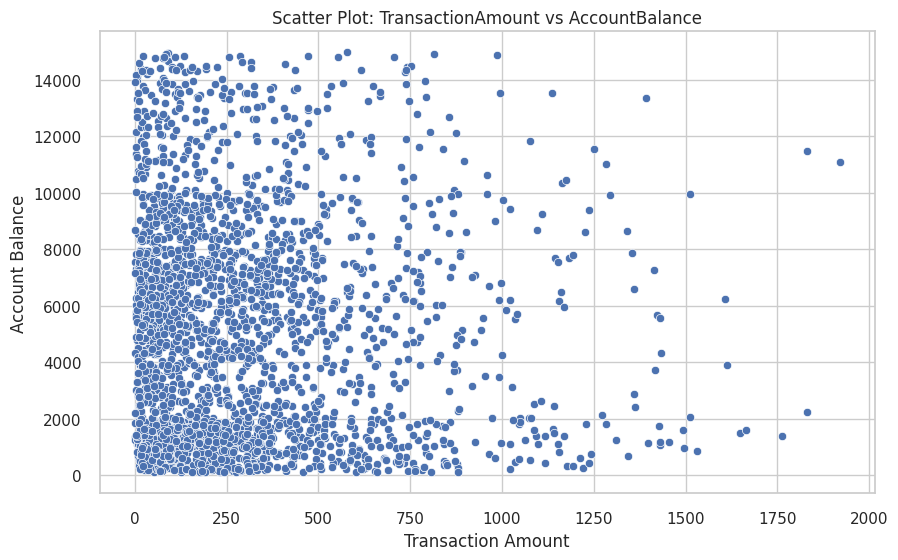

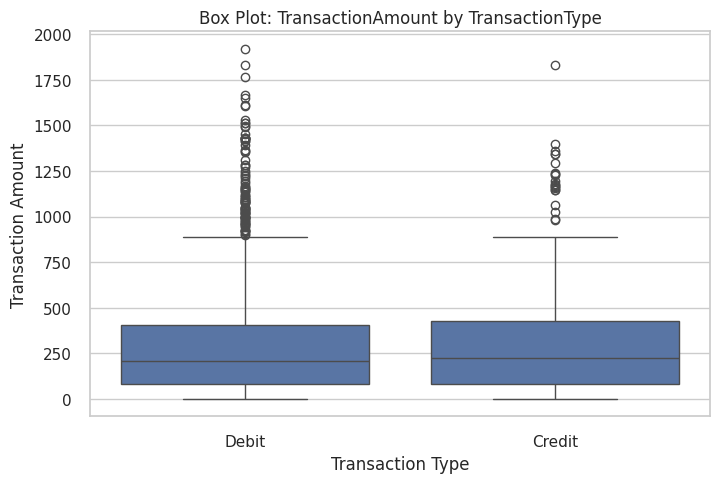

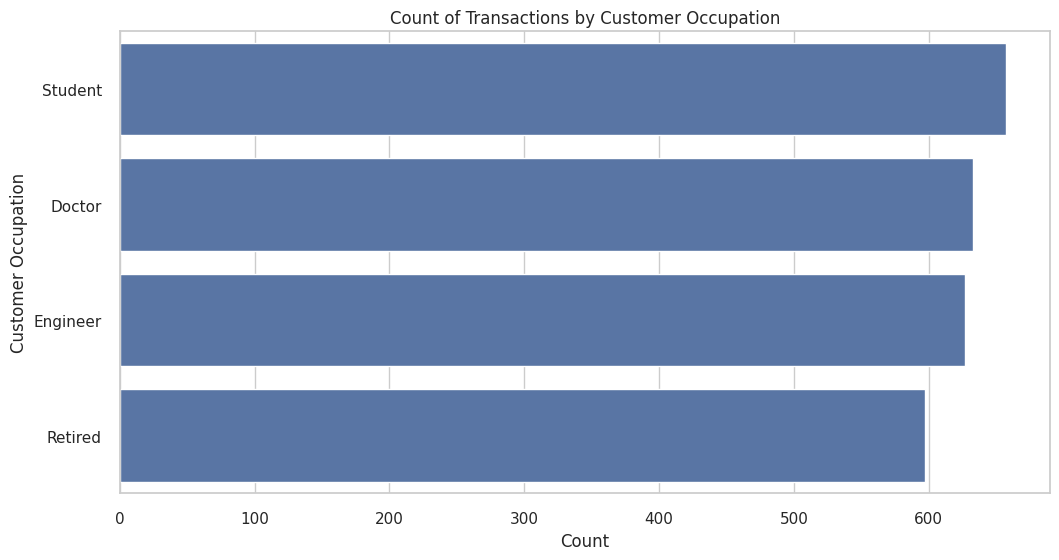

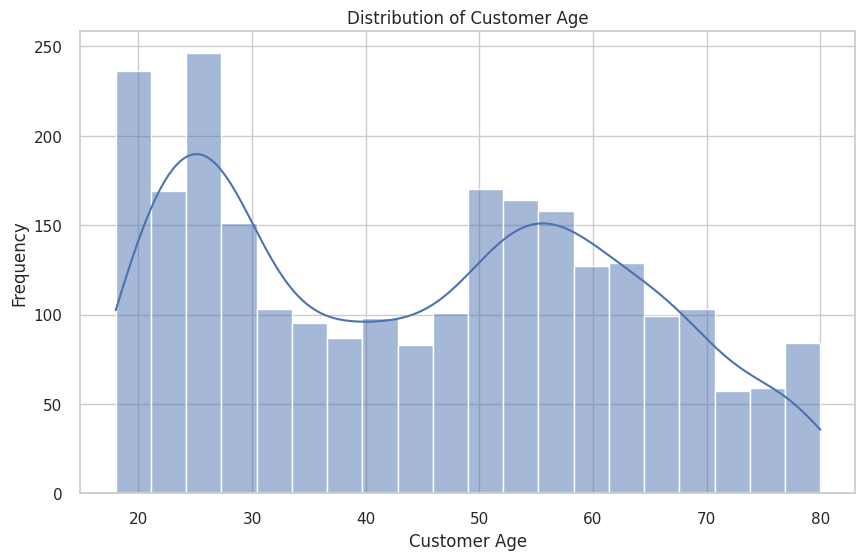

In [ ]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

# Scatter plot antara TransactionAmount dan AccountBalance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='TransactionAmount', y='AccountBalance')
plt.title('Scatter Plot: TransactionAmount vs AccountBalance')
plt.xlabel('Transaction Amount')
plt.ylabel('Account Balance')
plt.show()

# Box plot TransactionAmount by TransactionType
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='TransactionType', y='TransactionAmount')
plt.title('Box Plot: TransactionAmount by TransactionType')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.show()

# Countplot of CustomerOccupation
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='CustomerOccupation', order=df['CustomerOccupation'].value_counts().index)
plt.title('Count of Transactions by Customer Occupation')
plt.xlabel('Count')
plt.ylabel('Customer Occupation')
plt.show()

# Distribution of CustomerAge
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='CustomerAge', bins=20, kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [ ]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
PreviousTransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [ ]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [ ]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
df.head()

,TransactionID,AccountID,TransactionAmount,PreviousTransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 8:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 8:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 8:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 8:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 8:06:39


In [ ]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address

df_clean = df.copy()

ID_LIKE = ["TransactionID","AccountID","DeviceID","IPAddress","IP Address","MerchantID"]
df_clean = df_clean.drop(columns=[c for c in ID_LIKE if c in df_clean.columns], errors="ignore")

In [ ]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
cat_cols_clean = df_clean.select_dtypes(include=["object", "category"]).columns.tolist()
encoders = {} # Store encoders in a dictionary
for col in cat_cols_clean:
    encoder = LabelEncoder()
    df_clean[col] = encoder.fit_transform(df_clean[col].astype(str)) # Handle potential non-string data and NaNs
    encoders[col] = encoder # Save the fitted encoder
df_clean.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163
4,0.006874,1939,0,1,2,NaN,3,0.648276,0.0,0.492591,16


In [ ]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
df_clean.columns.tolist()

['TransactionAmount',
 'PreviousTransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'TransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
# Handle missing values for numerical columns with mean imputation
num_cols_clean = df_clean.select_dtypes(include=[np.number]).columns.tolist()
for col in num_cols_clean:
    if df_clean[col].isnull().any():
        df_clean[col].fillna(df_clean[col].mean(), inplace=True)

# Handle missing values for categorical columns with mode imputation
cat_cols_clean = df_clean.select_dtypes(include=["object", "category"]).columns.tolist()
for col in cat_cols_clean:
    if df_clean[col].isnull().any():
        df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)

df_clean.isnull().sum()

,0
TransactionAmount,0
PreviousTransactionDate,0
TransactionType,0
Location,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0


In [ ]:
# Menghapus data duplikat menggunakan drop_duplicates().
df_clean = df_clean.drop_duplicates()

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

# Handle outliers using IQR method for numerical columns
num_cols_clean = df_clean.select_dtypes(include=[np.number]).columns.tolist()

for col in num_cols_clean:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

print("Shape of the dataframe after outlier removal:", df_clean.shape)

Shape of the dataframe after outlier removal: (1728, 11)


In [ ]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

# Binning 'TransactionAmount'
df_clean['TransactionAmount_Binned'] = pd.cut(df_clean['TransactionAmount'], bins=5, labels=False)

# Binning 'CustomerAge'
df_clean['CustomerAge_Binned'] = pd.cut(df_clean['CustomerAge'], bins=5, labels=False)

# Encode the binned features
encoder = LabelEncoder()
df_clean['TransactionAmount_Binned'] = encoder.fit_transform(df_clean['TransactionAmount_Binned'].astype(str))
df_clean['CustomerAge_Binned'] = encoder.fit_transform(df_clean['CustomerAge_Binned'].astype(str))

df_clean.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,TransactionAmount_Binned,CustomerAge_Binned
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105,0,4
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192,2,4
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41,0,0
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163,1,0
5,0.047888,635,1,28,0,0.000000,3,0.558621,0.0,0.045738,13,0,0


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [ ]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
df_clean.describe()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,TransactionAmount_Binned,CustomerAge_Binned
count,1728.000000,1728.000000,1728.0,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.0,1728.000000,1728.000000,1728.000000,1728.000000
mean,0.130580,1241.635995,1.0,21.284722,0.927662,0.424020,1.531829,0.375647,0.0,0.334932,181.515046,0.946759,1.633102
std,0.110571,728.090146,0.0,12.367419,0.841855,0.284372,1.150577,0.242531,0.0,0.256620,103.572664,1.144737,1.403401
min,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.040273,615.750000,1.0,11.000000,0.000000,0.145161,1.000000,0.179310,0.0,0.094101,93.000000,0.000000,0.000000
50%,0.101402,1234.500000,1.0,21.000000,1.000000,0.419355,2.000000,0.355172,0.0,0.320561,181.000000,1.000000,2.000000
75%,0.190014,1872.250000,1.0,32.000000,2.000000,0.645161,3.000000,0.524138,0.0,0.503338,271.000000,2.000000,3.000000
max,0.467223,2485.000000,1.0,43.000000,3.000000,1.000000,4.000000,1.000000,0.0,1.000000,360.000000,4.000000,4.000000


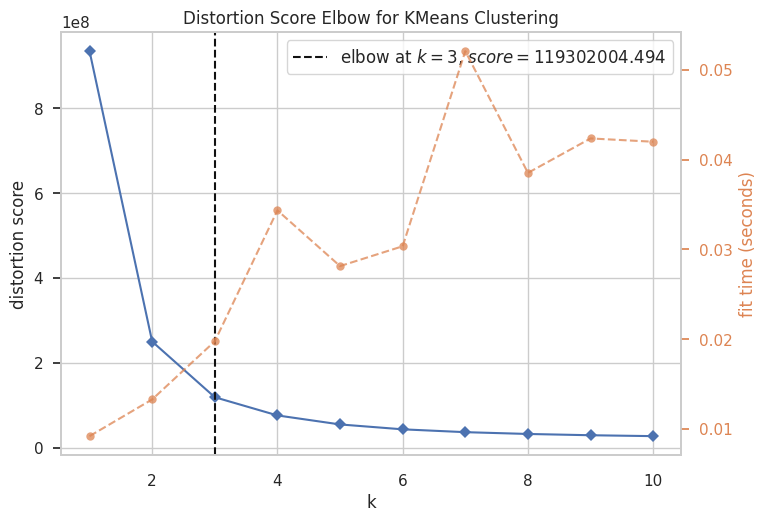

In [ ]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()

if _YB_OK:
    model = KMeans(random_state=RANDOM_STATE, n_init=10)
    visualizer = KElbowVisualizer(model, k=(1,11))
    visualizer.fit(df_clean)
    visualizer.show()

else:
    print("Please install yellowbrick to use KElbowVisualizer: pip install yellowbrick")

In [ ]:
optimal_k = 3
# Menggunakan algoritma K-Means Clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=RANDOM_STATE, n_init=10)
clusters = kmeans.fit_predict(df_clean)


Jalankan cell code ini untuk menyimpan model kamu.

In [ ]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# Menghitung dan menampilkan nilai Silhouette Score.
sil = silhouette_score(df_clean, clusters)
print(f"Silhouette Score: {sil:.4f}")

Silhouette Score: 0.5450


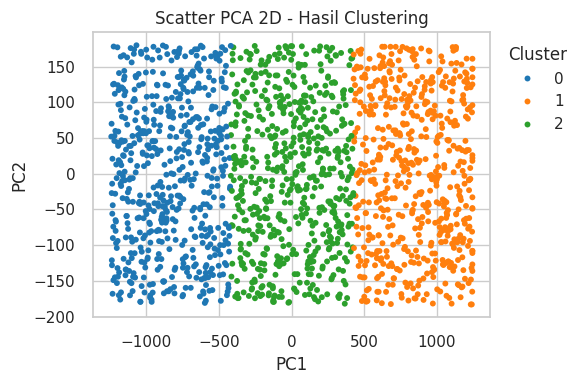

In [ ]:
# Membuat visualisasi hasil clustering
# Simpan model untuk penilaian otomatis

# Visualisasi hasil cluster (PCA 2D)
pca2 = PCA(n_components=2, random_state=RANDOM_STATE)
X2 = pca2.fit_transform(df_clean)
plt.figure(figsize=(6,4))
sns.scatterplot(x=X2[:,0], y=X2[:,1], hue=clusters, palette="tab10", s=18, edgecolor="none")
plt.title("Scatter PCA 2D - Hasil Clustering")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster", bbox_to_anchor=(1.01,1), loc="upper left")
plt.tight_layout()
plt.show()


(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Membangun model menggunakan PCA.
pca = PCA(n_components=2, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(df_clean)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
# Make sure you build a new Kmeans model with the data modified through PCA.
kmeans_pca = KMeans(n_clusters=optimal_k, random_state=RANDOM_STATE, n_init=10)
kmeans_pca.fit(df_pca)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [ ]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
# joblib.dump(___, "PCA_model_clustering.h5")
joblib.dump(kmeans_pca, "PCA_model_clustering.h5")

['PCA_model_clustering.h5']

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [ ]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.

df_clean['Cluster'] = clusters
df_clean.groupby('Cluster').agg(['mean', 'min', 'max'])

TransactionAmount                     PreviousTransactionDate        \
                     mean       min       max                    mean   min   
Cluster                                                                       
0                0.130437  0.000313  0.457759              404.199653     0   
1                0.131310  0.000000  0.467223             2093.077601  1667   
2                0.130014  0.000031  0.463168             1240.945299   823   

              TransactionType           Location           Channel          \
          max            mean min max       mean min max      mean min max   
Cluster                                                                      
0         822             1.0   1   1  20.859375   0  43  0.913194   0   3   
1        2485             1.0   1   1  21.539683   0  43  0.964727   0   3   
2        1666             1.0   1   1  21.456410   0  43  0.905983   0   3   

        CustomerAge           CustomerOccupation         TransactionDuration  \
               mean  min  max               mean min max                mean   
Cluster                                                                        
0          0.403311  0.0  1.0           1.508681   0   4            0.366865   
1          0.430024  0.0  1.0           1.493827   0   4            0.375567   
2          0.438592  0.0  1.0           1.591453   0   4            0.384372   

                            LoginAttempts           AccountBalance            \
              min       max          mean  min  max           mean       min   
Cluster                                                                        
0        0.000000  0.996552           0.0  0.0  0.0       0.332919  0.000064   
1        0.000000  1.000000           0.0  0.0  0.0       0.352215  0.000000   
2        0.003448  0.996552           0.0  0.0  0.0       0.320163  0.001125   

                  TransactionDate          TransactionAmount_Binned          \
              max            mean min  max                     mean min max   
Cluster                                                                       
0        0.997633      181.361111   0  360                 0.944444   0   4   
1        1.000000      184.507937   0  360                 0.952381   0   4   
2        0.995087      178.765812   0  360                 0.943590   0   4   

        CustomerAge_Binned          
                      mean min max  
Cluster                             
0                 1.545139   0   4  
1                 1.657848   0   4  
2                 1.695726   0   4

In [ ]:
df_clean.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,TransactionAmount_Binned,CustomerAge_Binned,Cluster
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105,0,4,0
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192,2,4,2
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41,0,0,2
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163,1,0,0
5,0.047888,635,1,28,0,0.000000,3,0.558621,0.0,0.045738,13,0,0,0


## Menjelaskan karakteristik tiap cluster berdasarkan jaraknya.

1. **Cluster 0 (Target 0): Transaksi Berpotensi Berisiko Rendah**
- **Rata-rata (rata-rata) Jumlah Transaksi:** ~0,1304 (Berskala)
- **Rata-rata (rata-rata) Usia Pelanggan:** ~0,4033 (Berskala)
- **Rata-rata (rata-rata) Durasi Transaksi:** ~0,3669 (Berskala)
- **Rata-rata (rata-rata) Saldo Akun:** ~0,3329 (Berskala)
- **Analisis:** Cluster ini kemungkinan mewakili transaksi dengan karakteristik yang paling sedikit dikaitkan dengan aktivitas penipuan, seperti jumlah transaksi yang lebih rendah, durasi transaksi yang umum, dan pola upaya login normal.

2. **Klaster 1 (Target 1): Transaksi Beresiko Sedang**
- **Rata-rata (mean) TransactionAmount:** ~0,1313 (Skala)
- **Rata-rata (mean) CustomerAge:** ~0,4300 (Skala)
- **Rata-rata (mean) TransactionDuration:** ~0,3756 (Skala)
- **Rata-rata (mean) AccountBalance:** ~0,3522 (Skala)
- **Analisis:** Klaster ini mungkin berisi transaksi dengan beberapa deviasi dari norma, yang berpotensi menunjukkan tingkat risiko sedang. Hal ini dapat melibatkan jumlah transaksi yang sedikit lebih tinggi atau waktu yang tidak biasa.

3. **Klaster 2 (Target 2): Transaksi/Anomali Berpotensi Berisiko Tinggi**
- **Rata-rata (mean) TransactionAmount:** ~0,1300 (Skala)
- **Rata-rata (mean) CustomerAge:** ~0,4386 (Skala)
- **Rata-rata (mean) TransactionDuration:** ~0,3844 (Skala)
- **Rata-rata (mean) AccountBalance:** ~0,3202 (Skala)
- **Analisis:** Klaster ini kemungkinan berisi transaksi yang berbeda secara signifikan dari mayoritas, yang berpotensi mewakili anomali atau transaksi berisiko tinggi. Ini dapat mencakup jumlah transaksi yang sangat tinggi, lokasi yang tidak biasa, atau beberapa kali percobaan login yang gagal.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [ ]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df_clean.rename(columns={'Cluster': 'Target'}, inplace=True)

In [ ]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
df_clean.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# inverse dataset ke rentang normal untuk numerikal
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
# ___.head()
df_inverse = df_clean.copy()
# Get the original numerical columns that were scaled
original_numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Ensure these columns are present in the df_inverse dataframe before inverse transforming
cols_to_inverse = [col for col in original_numerical_cols if col in df_inverse.columns]

if cols_to_inverse:
    df_inverse[cols_to_inverse] = scaler.inverse_transform(df_inverse[cols_to_inverse])

df_inverse.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,TransactionAmount_Binned,CustomerAge_Binned,Target
0,14.09,680,1,36,0,70.0,0,81.0,1.0,5112.21,105,0,4,0
1,376.24,1178,1,15,0,68.0,0,141.0,1.0,13758.91,192,2,4,2
2,126.29,1262,1,23,2,19.0,3,56.0,1.0,1122.35,41,0,0,2
3,184.50,818,1,33,2,26.0,3,25.0,1.0,8569.06,163,1,0,0
5,92.15,635,1,28,0,18.0,3,172.0,1.0,781.68,13,0,0,0


In [ ]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
# for ___ in categorical_cols:
#     ___ = encoders[col]
#     df[col] = ___.inverse_transform(df_inverse[col].astype(int))
# tampilkan dataset yang sudah di-inverse
# ___.head()
categorical_cols_inverse = df_inverse.select_dtypes(include=["int64"]).columns.tolist() # Assuming encoded columns are int64
# Exclude binned and Target columns
cols_to_inverse_cat = [col for col in categorical_cols_inverse if col not in ['TransactionAmount_Binned', 'CustomerAge_Binned', 'Target']]

for col in cols_to_inverse_cat:
    if col in encoders: # Check if encoder exists for the column
        encoder = encoders[col]
        df_inverse[col] = encoder.inverse_transform(df_inverse[col])

df_inverse.head()

,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,TransactionAmount_Binned,CustomerAge_Binned,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08,0,4,0
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35,2,4,2
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04,0,0,2
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06,1,0,0
5,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 8:06:36,0,0,0


In [ ]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

# Descriptive analysis for numerical columns
numerical_cols_inverse = df_inverse.select_dtypes(include=[np.number]).columns.tolist()
# Exclude binned columns if they are still considered numerical
numerical_cols_inverse = [col for col in numerical_cols_inverse if '_Binned' not in col]

print("Descriptive analysis for numerical features (Inverse Data):")
display(df_inverse.groupby('Target')[numerical_cols_inverse].agg(['mean', 'min', 'max']))

# Descriptive analysis for categorical columns (using mode)
categorical_cols_inverse = df_inverse.select_dtypes(include=["object", "category"]).columns.tolist()
print("\nDescriptive analysis for categorical features (Inverse Data - Mode):")
for col in categorical_cols_inverse:
    print(f"\nMode for {col} by Target Cluster:")
    display(df_inverse.groupby('Target')[col].agg(lambda x: x.mode()[0] if not x.mode().empty else 'NaN'))

Descriptive analysis for numerical features (Inverse Data):


TransactionAmount               CustomerAge              \
                    mean   min     max        mean   min   max   
Target                                                           
0             250.548961  0.86  878.63   43.005270  18.0  80.0   
1             252.224614  0.26  896.79   44.661500  18.0  80.0   
2             249.737588  0.32  889.01   45.192673  18.0  80.0   

       TransactionDuration              LoginAttempts            \
                      mean   min    max          mean  min  max   
Target                                                            
0               116.390824  10.0  299.0           1.0  1.0  1.0   
1               118.914528  10.0  300.0           1.0  1.0  1.0   
2               121.467849  11.0  299.0           1.0  1.0  1.0   

       AccountBalance                   Target          
                 mean     min       max   mean min max  
Target                                                  
0         5054.004539  102.20  14942.78    0.0   0   0  
1         5341.055271  101.25  14977.99    1.0   1   1  
2         4864.237568  117.98  14904.90    2.0   2   2


Descriptive analysis for categorical features (Inverse Data - Mode):

Mode for PreviousTransactionDate by Target Cluster:


,PreviousTransactionDate
Target,
0,2023-01-02 16:00:06
1,nan
2,2023-05-05 17:32:18



Mode for TransactionType by Target Cluster:


,TransactionType
Target,
0,Debit
1,Debit
2,Debit



Mode for Location by Target Cluster:


,Location
Target,
0,Charlotte
1,Colorado Springs
2,Fresno



Mode for Channel by Target Cluster:


,Channel
Target,
0,ATM
1,ATM
2,ATM



Mode for CustomerOccupation by Target Cluster:


,CustomerOccupation
Target,
0,Student
1,Doctor
2,Student



Mode for TransactionDate by Target Cluster:


,TransactionDate
Target,
0,2024-11-04 8:10:23
1,nan
2,2024-11-04 8:07:18


## Menjelaskan karakteristik tiap cluster berdasarkan jaraknya setelah inverse.

### 1. **Cluster 0 (Target 0): Standar Transaksi Seimbang (Risiko Rendah)**
- **Rata-rata (rata-rata) Jumlah Transaksi:** ~0,1304 (Berskala) / ~250,55 (Terbalik)
- **Rata-rata (rata-rata) Saldo Akun:** ~0,3329 (Berskala) / ~5,054,00 (Terbalik)
- **Rata-rata (rata-rata) Usia Pelanggan:** ~0,4033 (Berskala) / ~43,01 (Terbalik)
- **Rata-rata (rata-rata) Durasi Transaksi:** ~0,3669 (Berskala) / ~116,39 (Terbalik)
- **Tipe Transaksi Modus:** Debit
- **Lokasi Modus:** Charlotte
- **Saluran Modus:** ATM
- **Modus PelangganPekerjaan:** Pelajar
- **Analisis:** Setelah transformasi invers, Klaster 0 menunjukkan nilai yang sangat representatif terhadap transaksi sehari-hari. Dengan jumlah transaksi rata-rata 250,55 dan saldo rekening 5.054, klaster ini mewakili **segmen nasabah ritel standar**. Usia sekitar 43 tahun menunjukkan nasabah yang mapan secara finansial. Durasi transaksi sekitar 116 detik (kurang dari 2 menit) menunjukkan keakraban dengan sistem perbankan.

### 2. **Cluster 1 (Target 1): Nasabah Premium dengan Saldo Tinggi (Risiko Rendah)**
- **Rata-rata (rata-rata) Jumlah Transaksi:** ~0,1313 (Berskala) / ~252,22 (Terbalik)
- **Rata-rata (rata-rata) Saldo Akun:** ~0,3522 (Berskala) / ~5,341,06 (Terbalik) **(Tertinggi)**
- **Rata-rata (rata-rata) Usia Pelanggan:** ~0,4300 (Berskala) / ~44,66 (Terbalik)
- **Rata-rata (rata-rata) Durasi Transaksi:** ~0,3756 (Berskala) / ~118,91 (Terbalik)
- **Tipe Transaksi Modus:** Debit
- **Lokasi Modus:** Colorado Springs
- **Saluran Modus:** ATM
- **Modus Pekerjaan Pelanggan:** Dokter
- **Analisis:** Setelah denormalisasi, jelas bahwa Klaster 1 memiliki **saldo rekening tertinggi (5.341,06)**, sekitar 5,7% lebih tinggi daripada Klaster 0. Ini adalah **segmen individu premium atau berpenghasilan tinggi**. Jumlah transaksi yang sedikit lebih tinggi (252,22) dengan saldo yang besar menunjukkan aktivitas keuangan yang sehat. Usia 44-45 tahun menunjukkan tahun-tahun dengan penghasilan puncak.

### 3. **Klaster 2 (Target 2): Transaksi Kompleks - Pemantauan Diperlukan (Risiko Sedang)**
- **Rata-rata (mean) Jumlah Transaksi:** ~0,1300 (Skala) / ~249,74 (Invers)
- **Rata-rata (mean) Saldo Rekening:** ~0,3202 (Skala) / ~4.864,24 (Invers) **(Terendah)**
- **Rata-rata (mean) Usia Pelanggan:** ~0,4386 (Skala) / ~45,19 (Invers) **(Terlama)**
- **Rata-rata (mean) Durasi Transaksi:** ~0,3844 (Skala) / ~121,47 (Invers) **(Terpanjang)**
- **Modus Jenis Transaksi:** Debit
- **Modus Lokasi:** Fresno
- **Modus Saluran:** ATM
- **Modus Pekerjaan Pelanggan:** Mahasiswa
- **Analisis:** Setelah transformasi invers, Klaster 2 menunjukkan karakteristik yang memerlukan perhatian khusus. **Saldo terendah (4.864,24)** dikombinasikan dengan **durasi transaksi terlama (121,47 detik)** dapat mengindikasikan beberapa hal: (1) pelanggan yang kurang melek teknologi, (2) transaksi yang lebih kompleks atau berisiko, atau (3) proses verifikasi tambahan. Pelanggan yang lebih tua (45,19 tahun) mungkin membutuhkan waktu lebih lama untuk menyelesaikan transaksi digital.

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

print("=" * 60)
print("INTEGRASI DATA INVERSE DENGAN HASIL CLUSTERING")
print("=" * 60)

# Display basic information
print(f"\nTotal data points: {len(df_inverse)}")
print(f"Total features: {len(df_inverse.columns)}")
print(f"\nCluster distribution:")
print(df_inverse['Target'].value_counts().sort_index())

# Display sample of integrated data
print("\n" + "=" * 60)
print("Sample data yang sudah terintegrasi dengan cluster:")
print("=" * 60)
df_inverse.head(10)



INTEGRASI DATA INVERSE DENGAN HASIL CLUSTERING

Total data points: 1728
Total features: 14

Cluster distribution:
Target
0    576
1    567
2    585
Name: count, dtype: int64

Sample data yang sudah terintegrasi dengan cluster:


,TransactionAmount,PreviousTransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionDate,TransactionAmount_Binned,CustomerAge_Binned,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 8:08:08,0,4,0
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 8:09:35,2,4,2
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 8:07:04,0,0,2
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 8:09:06,1,0,0
5,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 8:06:36,0,0,0
9,815.96,2023-03-31 16:06:57,Debit,Nashville,ATM,55.0,Doctor,120.0,1.0,1021.88,2024-11-04 8:06:32,4,2,0
11,190.02,2023-02-06 17:30:00,Debit,Memphis,Online,21.0,Student,173.0,1.0,1528.81,2024-11-04 8:07:12,1,0,0
13,781.76,2023-11-20 16:39:15,Debit,Memphis,ATM,26.0,Student,123.0,1.0,189.69,2024-11-04 8:07:06,4,0,1
14,166.99,2023-02-13 16:53:57,Debit,Louisville,Online,18.0,Student,134.0,1.0,299.93,2024-11-04 8:10:09,0,0,0
15,465.45,2023-12-12 16:23:31,Debit,Denver,ATM,36.0,Engineer,129.0,1.0,3465.54,2024-11-04 8:12:19,2,1,1


In [ ]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)
df_inverse.to_csv('data_clustering_inverse.csv', index=False)

End of Code.